# Data import and discovery

## Library and data import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

dataset, info = tfds.load('oxford_iiit_pet',split=['train[:80%]', 'train[80%:]','test'], as_supervised=True, with_info=True)
train_set_raw, valid_set_raw, test_set_raw = dataset

train_set_raw


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

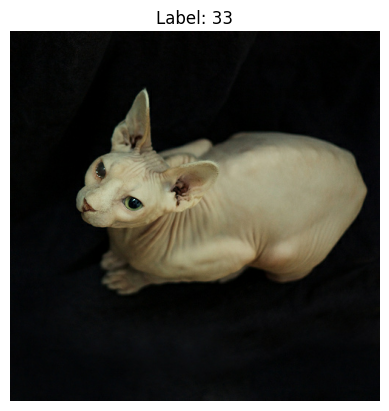

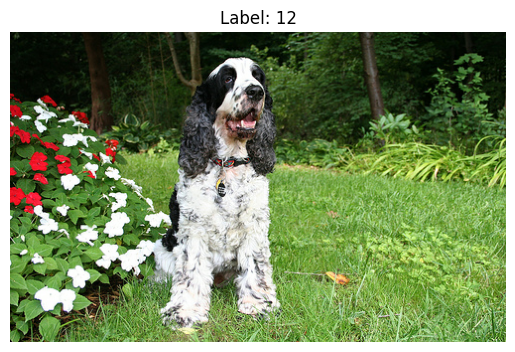

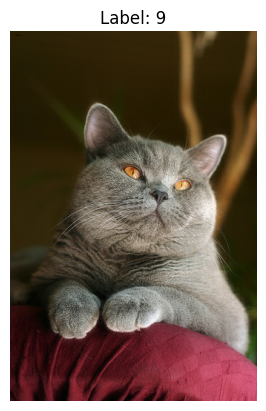

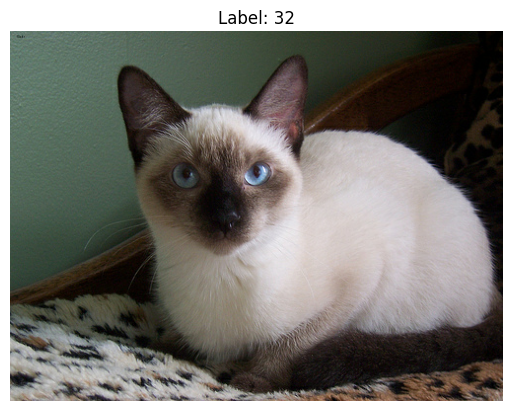

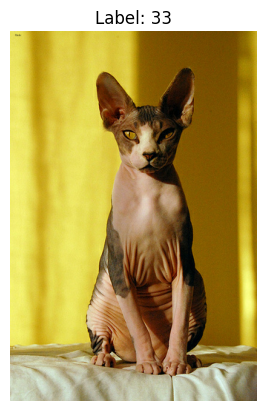

In [16]:
import matplotlib.pyplot as plt

# Display some processed images
for image, label in train_set_raw.take(5):
    plt.figure()
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")
plt.show()

## Image dimension

In [6]:
def find_smallest_resolution(dataset):

    min_height = float('inf')
    min_width = float('inf')
    for image, label in dataset:
        height,width,_ = image.shape

        min_height = min(min_height,height)
        min_width = min(min_width,width)

    print(f"The minimum height resolution: {min_height}\n"
          f"The minimum width resolution: {min_width}")
    
find_smallest_resolution(train_set_raw)
find_smallest_resolution(valid_set_raw)
find_smallest_resolution(test_set_raw)


The minimum height resolution: 108
The minimum width resolution: 114
The minimum height resolution: 112
The minimum width resolution: 150
The minimum height resolution: 103
The minimum width resolution: 137


So the minimum height resolution is 103 and the minimum width resolution is 114. I will resize the images to have dimension of (96x96x3) for the pretrained MobileNet network

In [ ]:
def preprocess_image(image,target_size = (96, 96)):
    '''This function resize an image while keeping the aspect ratio such that the shorter side is 96 pixels'''
    image = tf.image.resize(image, target_size)
    return image

def preprocess_dataset(dataset, target_size = (96,96)):
    '''This function applies the preprocess_image() on the images in a dataset to resize the iamges to the target_size (default 96x96)'''
    return dataset.map(lambda image, label: (preprocess_image(image,target_size), label))

# The desired size for the processed images
TARGET_SIZE = (256,256)
train_set_processed = preprocess_dataset(train_set_raw,target_size=TARGET_SIZE)
valid_set_processed = preprocess_dataset(valid_set_raw,target_size=TARGET_SIZE)
test_set_processed = preprocess_dataset(test_set_raw,target_size=TARGET_SIZE)

find_smallest_resolution(train_set_processed)


The minimum height resolution: 256
The minimum width resolution: 256
<_MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


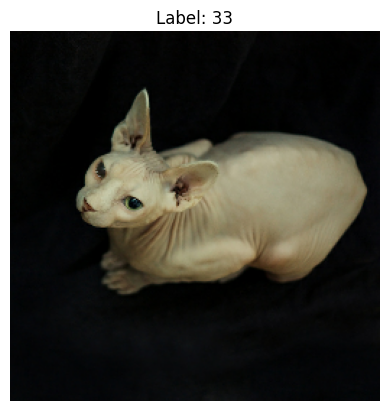

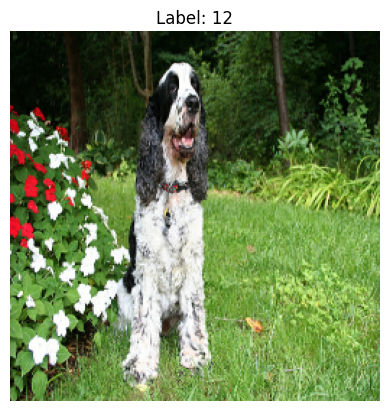

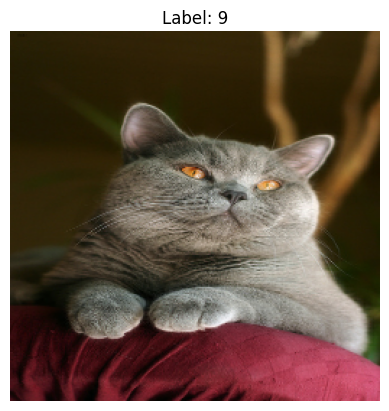

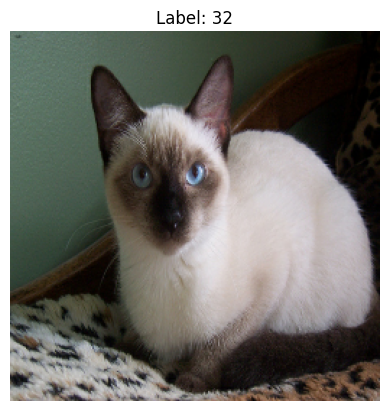

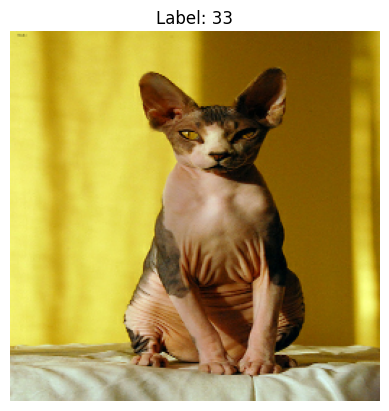

In [26]:
import matplotlib.pyplot as plt

# Display some processed images
for image, label in train_set_processed.take(5):
    plt.figure()
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")
plt.show()

## Data Extraction Block
In this code block, I define a function to extract the image and label data from any of the three datasets. This make it easier to work with the data in the form of numpy arrays instead of PrefetchDataset objects when importing the dataset from tensorflow.

Since the dataset has images of different dimensions, this function will also resize the images to a 

In [7]:
def get_nparray_dataset(dataset):
    image_list = []
    label_list = []

    for image,label in dataset:
        image_list.append(image.numpy())
        label_list.append(label.numpy())

    image_list_npararay = np.array(image_list)
    label_list_nparray = np.array(label_list)
    
    return image_list_npararay, label_list_nparray

In [29]:
train_image_array = []
train_image_array, train_label_array = get_nparray_dataset(train_set_processed)
valid_image_array, valid_label_array = get_nparray_dataset(valid_set_processed)
test_image_array, test_label_array = get_nparray_dataset(test_set_processed)

print(train_image_array.shape, train_label_array.shape)
print(valid_image_array.shape, valid_label_array.shape)
print(test_image_array.shape, test_label_array.shape)

(2944, 256, 256, 3) (2944,)
(736, 256, 256, 3) (736,)
(3669, 256, 256, 3) (3669,)


# Model Construction and Training


In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape )

# Model Evaluation